In [1]:
!unzip heartbeat-sounds.zip

Archive:  heartbeat-sounds.zip
  inflating: set_a.csv               
  inflating: set_a/Aunlabelledtest__201012172010.wav  
  inflating: set_a/Aunlabelledtest__201101051105.wav  
  inflating: set_a/Aunlabelledtest__201101061552.wav  
  inflating: set_a/Aunlabelledtest__201101091156.wav  
  inflating: set_a/Aunlabelledtest__201101110659.wav  
  inflating: set_a/Aunlabelledtest__201101152256.wav  
  inflating: set_a/Aunlabelledtest__201101220549.wav  
  inflating: set_a/Aunlabelledtest__201101241434.wav  
  inflating: set_a/Aunlabelledtest__201102081033.wav  
  inflating: set_a/Aunlabelledtest__201102081045.wav  
  inflating: set_a/Aunlabelledtest__201102200848.wav  
  inflating: set_a/Aunlabelledtest__201103011036.wav  
  inflating: set_a/Aunlabelledtest__201103140236.wav  
  inflating: set_a/Aunlabelledtest__201103170122.wav  
  inflating: set_a/Aunlabelledtest__201103200518.wav  
  inflating: set_a/Aunlabelledtest__201103201314.wav  
  inflating: set_a/Aunlabelledtest__201103232251.wa

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))
import librosa
import librosa.display as libdisplay
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
max_pad_len = 388

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Algo anda mal: ", file_name)
        return None 
     
    return mfccs

In [0]:
dataset_path = '/content/'
metadata = pd.read_csv('/content/set_a.csv')

features = []

In [5]:
import glob, os
os.chdir("/content/set_a")


MAX_LEN_MFCC = []

for file in glob.glob("*.wav"):
    #print(file)
    #extract_features(file)

    audio,sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #print(mfccs.shape[1])
    MAX_LEN_MFCC.append(mfccs.shape[1])

print(max(MAX_LEN_MFCC)   )

388


In [0]:
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(dataset_path),str(row['fname']))
    
    class_label = row['fname']
    data = extract_features(file_name)
    
    features.append([data,class_label])

In [7]:
DATAX = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(DATAX), ' files')

Finished feature extraction from  124  files


In [0]:
str(DATAX['class_label'][0]).split('__')[0]

LABEL = []

for i in range(len(DATAX)):
  str(DATAX['class_label'][i]).split('__')[0]
  LABEL.append(str(DATAX['class_label'][i]).split('__')[0])    

In [9]:
DATAX['LABEL'] = LABEL
NEW_DATAX = DATAX.drop(columns=['class_label'])
#NEW_DATAX.to_csv(r'NEW_DATAX.csv')
NEW_DATAX.head(10)

,feature,LABEL
0,"[[-629.3815027521428, -614.3528398171517, -616...",set_a/artifact
1,"[[-990.9772750518831, -990.1641333446495, -989...",set_a/artifact
2,"[[-632.0832226192613, -622.4774297438613, -623...",set_a/artifact
3,"[[-322.1109746901032, -295.3795520831543, -277...",set_a/artifact
4,"[[-294.6576987096496, -292.31416581691946, -28...",set_a/artifact
5,"[[-903.8972458542058, -903.8972458542058, -903...",set_a/artifact
6,"[[-472.095677624068, -461.82470537247826, -476...",set_a/artifact
7,"[[-355.33063187666244, -337.0625843885191, -32...",set_a/artifact
8,"[[-528.5260130536474, -522.9939373044792, -521...",set_a/artifact
9,"[[-69.77288599233084, -72.96802317865328, -79....",set_a/artifact


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, utils
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

X = np.array(NEW_DATAX.feature.tolist())
y = np.array(NEW_DATAX.LABEL.tolist())

In [0]:
le = LabelEncoder()
yy = tf.keras.utils.to_categorical(le.fit_transform(y))

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [12]:
print('NEW_DATAX shape >> {}'.format(NEW_DATAX.shape))
print('len X_train >> {}'.format(len(x_train)))
print('len X_test >> {}'.format(len(x_test)))

print('X_train shape >> {}'.format(x_train.shape))

print('Num_Rows >> {}'.format(len(mfccs)))
print('Num_Columns >> {}'.format(max(MAX_LEN_MFCC)))


NEW_DATAX shape >> (124, 2)
len X_train >> 99
len X_test >> 25
X_train shape >> (99, 40, 388)
Num_Rows >> 40
Num_Columns >> 388


In [0]:
num_rows = 40
num_columns = 388
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(num_labels, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [16]:
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 387, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 193, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 193, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 192, 32)       2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 96, 32)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 96, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 95, 64)         8

In [18]:
#tf.keras.callbacks.ModelCheckpoint

from datetime import datetime 

#num_epochs = 500
#num_batch_size = 128

#num_epochs = 500
#num_batch_size = 256

num_epochs = 1000
num_batch_size = 256

#num_epochs = 1000
#num_batch_size = 256

#checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='sound_classification_Bagus.hdf5', 
#                               verbose=1, save_best_only=True)
start = datetime.now()

#model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 99 samples, validate on 25 samples
Epoch 1/1000
99/99 [==============================] - 0s 449us/sample - loss: 0.0677 - acc: 0.9798 - val_loss: 2.8797 - val_acc: 0.8000
Epoch 2/1000
99/99 [==============================] - 0s 427us/sample - loss: 0.0840 - acc: 0.9697 - val_loss: 2.9276 - val_acc: 0.7600
Epoch 3/1000
99/99 [==============================] - 0s 427us/sample - loss: 0.0579 - acc: 0.9596 - val_loss: 2.9501 - val_acc: 0.7600
Epoch 4/1000
99/99 [==============================] - 0s 424us/sample - loss: 0.0386 - acc: 0.9899 - val_loss: 2.9490 - val_acc: 0.7600
Epoch 5/1000
99/99 [==============================] - 0s 429us/sample - loss: 0.0644 - acc: 0.9596 - val_loss: 2.8483 - val_acc: 0.7600
Epoch 6/1000
99/99 [==============================] - 0s 360us/sample - loss: 0.0559 - acc: 0.9697 - val_loss: 2.7408 - val_acc: 0.8000
Epoch 7/1000
99/99 [==============================] - 0s 360us/sample - loss: 0.0435 - acc: 0.9798 - val_loss: 2.6709 - val_acc: 0.8000
Epoc

In [19]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])
#model.save('/content/KHA_BAGUS_SOUND.h5')

Training Accuracy:  0.97979796
Testing Accuracy:  0.84


In [0]:
def buat_prediction(file_name):
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [23]:
filename = '/content/8SC.wav'
buat_prediction(filename)



Algo anda mal:  /content/8SC.wav


AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


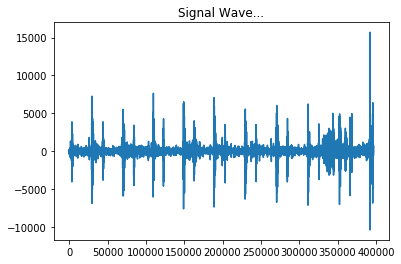

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('/content/set_a/Aunlabelledtest__201101220549.wav' , "r")
#spf = wave.open('/content/Sound/8SC.wav' , "r")
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")


# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(signal)
plt.show()